In [2]:
import numpy as np
import matplotlib.pyplot as plt

import open3d as o3d
from sklearn.linear_model import RANSACRegressor

# Regressing a Line

## Dataset
The data is basically the same as in the previous assignment

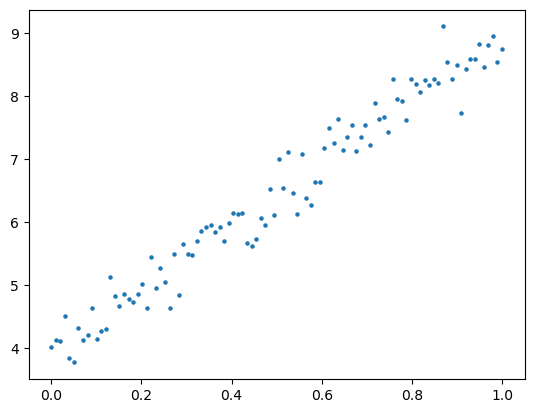

In [3]:
x = np.linspace(0, 1, 100)
y = 5 * x + 4 + np.random.normal(0, 0.31, 100)

plt.scatter(x, y, s=5)
plt.show()

In [4]:
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

## Regression
Fit + Predict

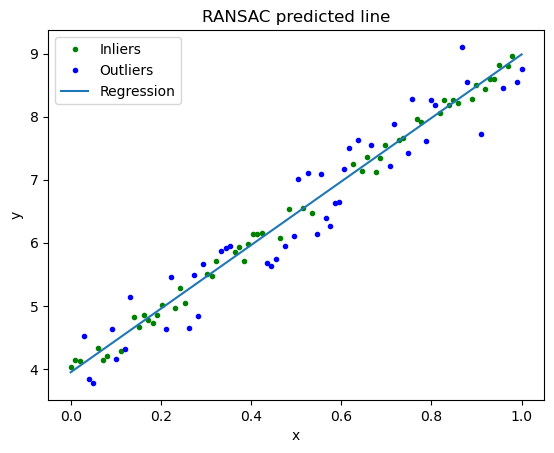

In [5]:
ransac = RANSACRegressor(residual_threshold=0.2)
ransac.fit(x, y)
inliers = ransac.inlier_mask_
outliers = (inliers == False)

line_x = x.reshape(1, -1).squeeze()
line_y = ransac.predict(line_x.reshape(-1, 1))

plt.title('RANSAC predicted line')
plt.plot(x[inliers], y[inliers], 'og', markersize=3, label='Inliers')
plt.plot(x[outliers], y[outliers], 'ob', markersize=3, label='Outliers')
plt.plot(line_x, line_y, label='Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Plane Regression

## Dataset
Source: https://skfb.ly/6VWPF

In [143]:
obj = o3d.io.read_point_cloud('assets/LasTree.ply')

In [144]:
points = np.asarray(obj.points)
x, y = points[:, 0:3:2], points[:, 1]

## Regression

In [146]:
# in case we found wrong plane, we can drop
# it to find the right one further
def drop_plane(x, y, points, inliers):
    return x[inliers == False], y[inliers == False], points[inliers == False]

Exactly the same algorithm as before

In [163]:
ransac = RANSACRegressor(residual_threshold=1, stop_n_inliers=100000)
ransac.fit(x, y)
inliers = ransac.inlier_mask_
outliers = (inliers == False)

In [165]:
inliers_color = np.array([0, 1, 0.2])
outliers_color = np.array([0.1, 0, 1])

color_schema = np.zeros_like(points)
color_schema[inliers, :] = inliers_color
color_schema[outliers, :] = outliers_color
pc_result = o3d.geometry.PointCloud()
pc_result.points = o3d.utility.Vector3dVector(points)
pc_result.colors = o3d.utility.Vector3dVector(color_schema)
o3d.visualization.draw_geometries([pc_result])

2023-03-13 13:37:39.473 python[19489:162283] Warning: Window move completed without beginning


![](assets/ransac.png)

To calculate the distance it is enough to simply calculate norms

In [167]:
points = np.concatenate([x[outliers], y[outliers].reshape(-1, 1)], axis=1)
norms = np.linalg.norm(points, axis=1)
print(np.min(norms))

0.4664014786587539
